<a href="https://colab.research.google.com/github/dantrainor9/Disease_Prediction/blob/main/DiseasePrediction_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
path = '/content/drive/MyDrive/Personal Projects/Disease Prediction/Training.csv'
df = pd.read_csv(path)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df.drop(columns=['Unnamed: 133'], inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of       itching  ...                                prognosis
0           1  ...                         Fungal infection
1           0  ...                         Fungal infection
2           1  ...                         Fungal infection
3           1  ...                         Fungal infection
4           1  ...                         Fungal infection
...       ...  ...                                      ...
4915        0  ...  (vertigo) Paroymsal  Positional Vertigo
4916        0  ...                                     Acne
4917        0  ...                  Urinary tract infection
4918        0  ...                                Psoriasis
4919        0  ...                                 Impetigo

[4920 rows x 133 columns]>

In [ ]:
df.shape

(4920, 133)

In [ ]:
df['prognosis'].value_counts(normalize=True)

Alcoholic hepatitis                        0.02439
Fungal infection                           0.02439
GERD                                       0.02439
Acne                                       0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Dengue                                     0.02439
Osteoarthristis                            0.02439
Peptic ulcer diseae                        0.02439
Dimorphic hemmorhoids(piles)               0.02439
Hypertension                               0.02439
Impetigo                                   0.02439
Bronchial Asthma                           0.02439
Malaria                                    0.02439
Tuberculosis                               0.02439
Cervical spondylosis                       0.02439
Drug Reaction                              0.02439
Hepatitis D                                0.02439
Pneumonia                                  0.02439
Hepatitis C                                0.02439
Common Cold                    

Love to see these kinds of balanced classes in my target column

In [ ]:
number = LabelEncoder()
df['prognosis'] = number.fit_transform(df['prognosis'].astype('str'))

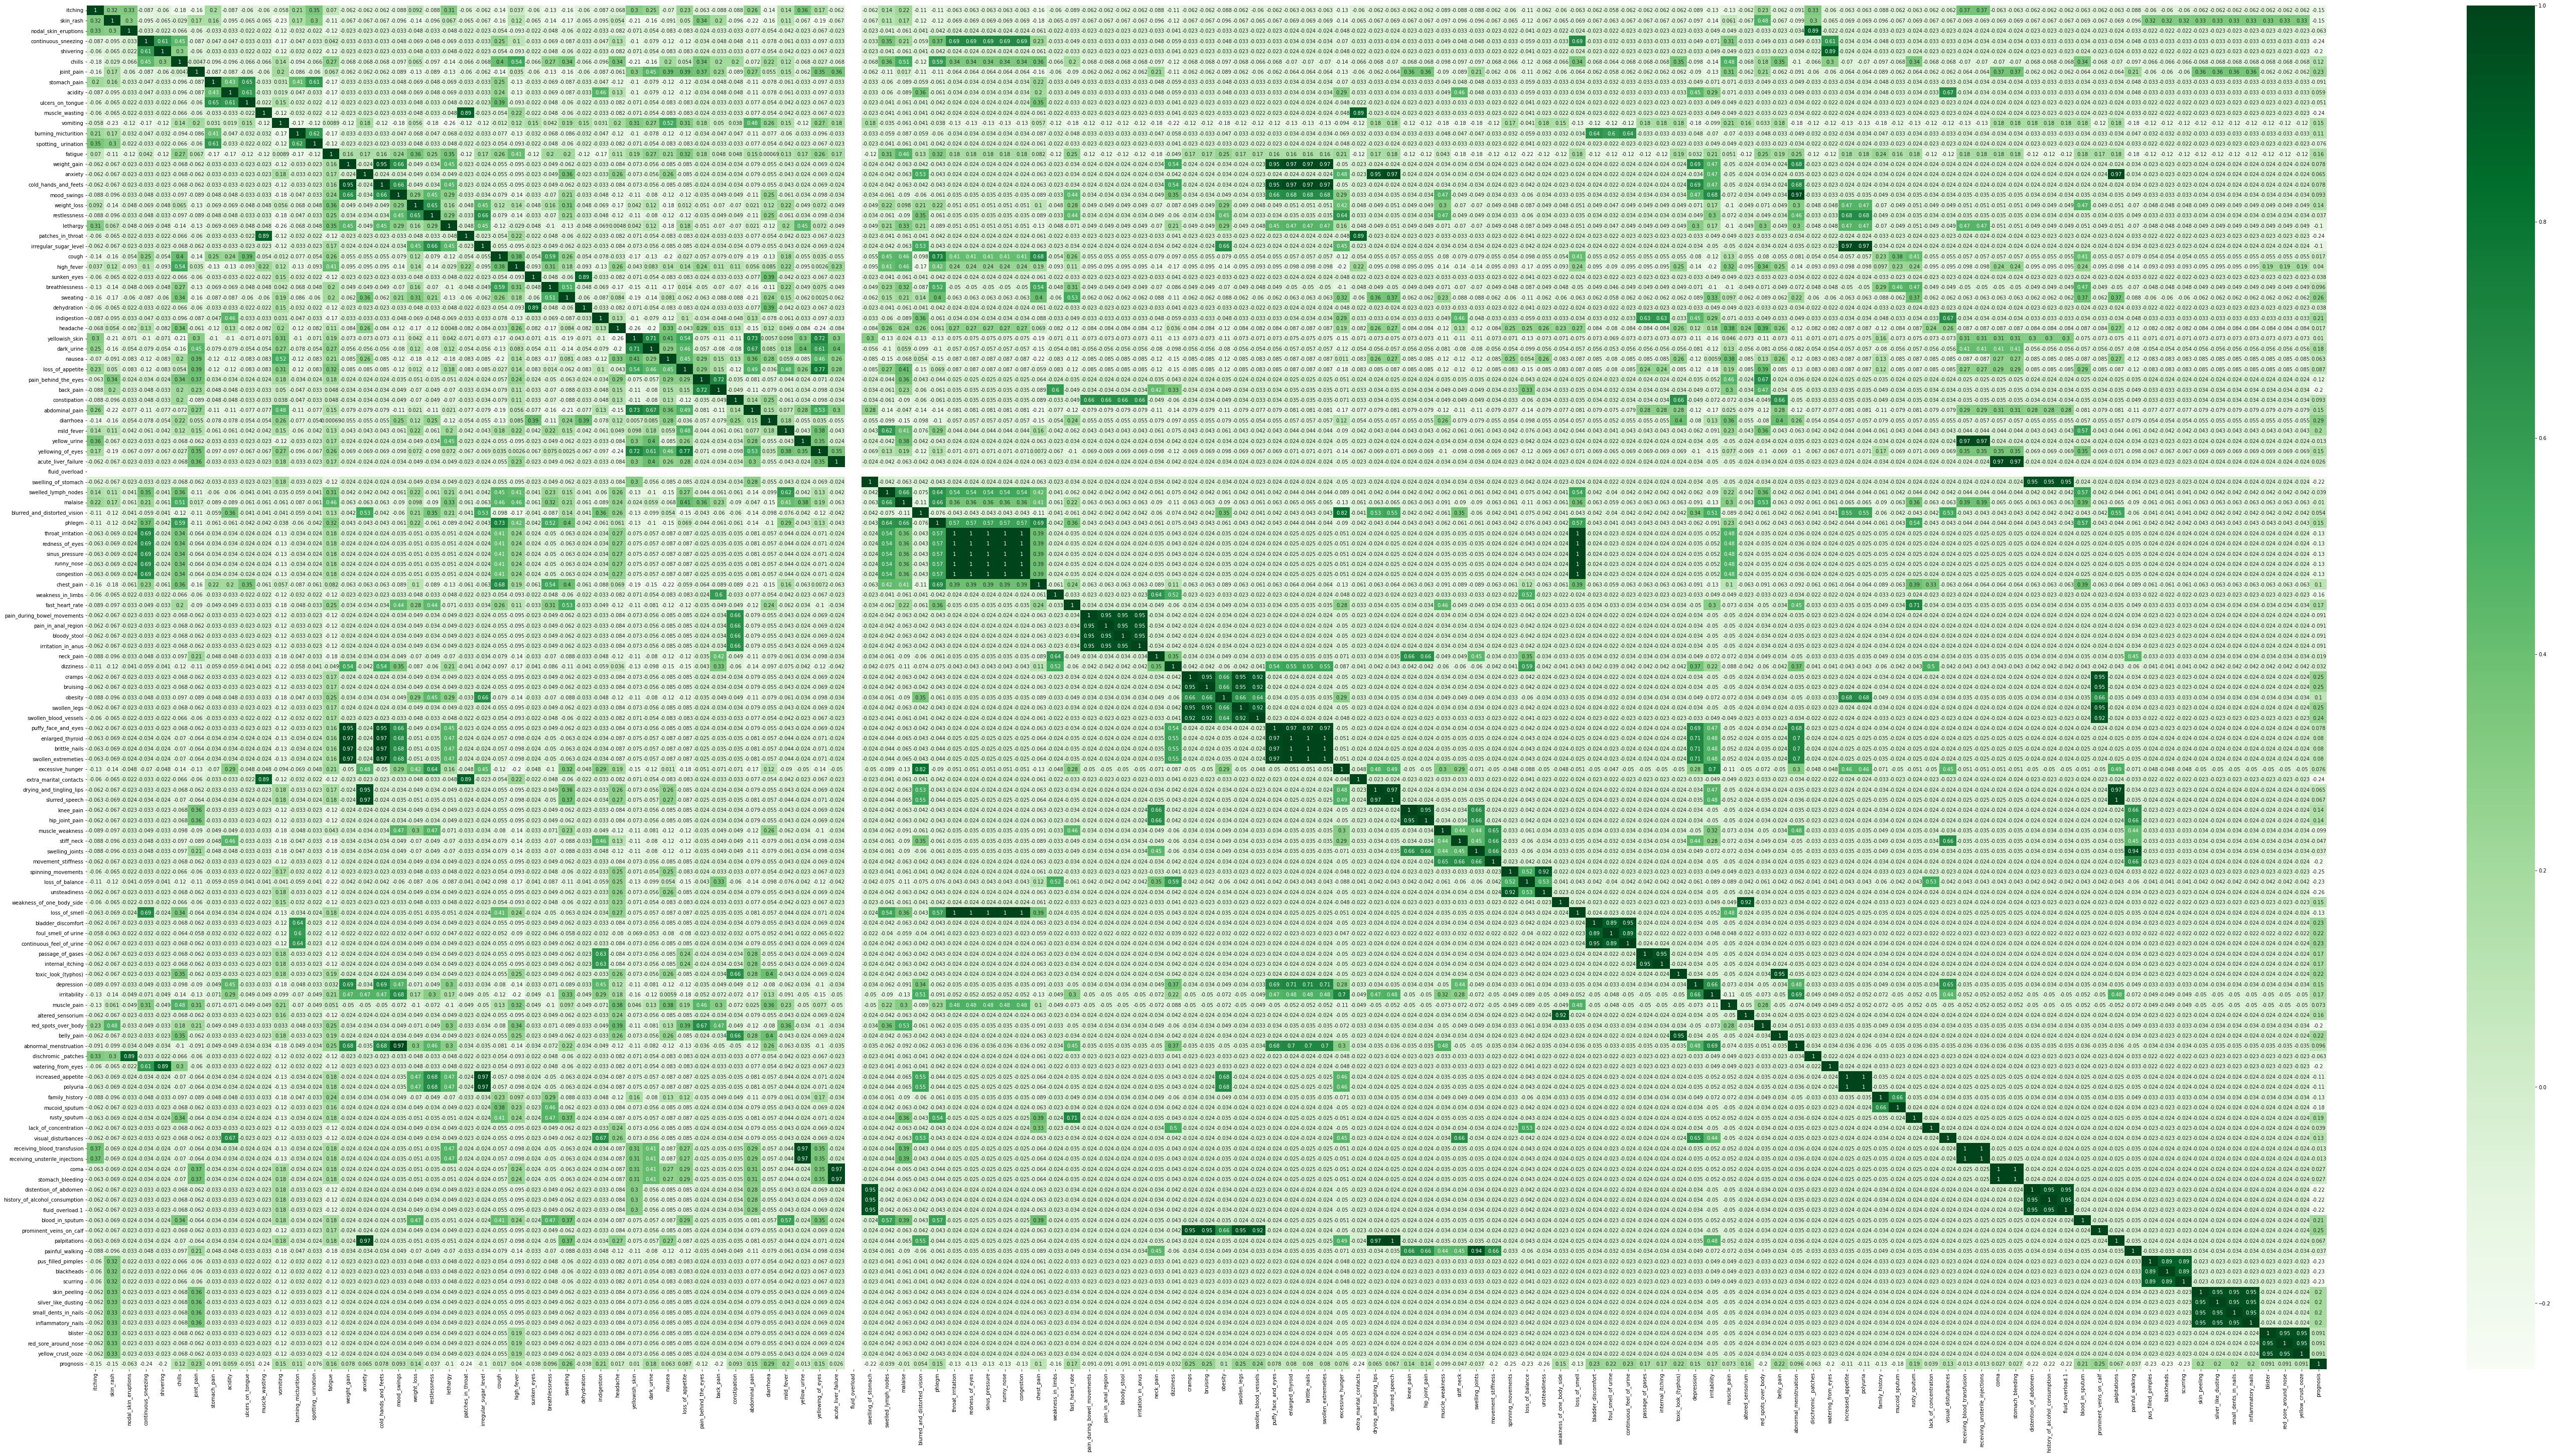

In [ ]:
corr = df.corr()
plt.figure(figsize=(100,50))
sns.heatmap(data=corr, cmap='Greens', annot=True);

Some of these correlations make a lot of sense, and indicate a lot of strengths about the way this data was collected. An example of this can be seen in the thyroid related symptoms of 'enlarged_thyroid', 'puffy_face_and_eyes', 'brittle_nails', and 'swollen_extremities'. These symptoms having such a strong correlation, especially considering the 'prognosis' possibilities include both hypothyroidism and hyperthyroidism, is reassuring about the quality of our dataset. However, we can see some weaknesses as well. 'swollen_extremities' can also be caused by Cushing's syndrome, for example, but this was not tracked as a prognosis. There is also a 100% correlation between slurred speech and palpitations, likely indicating slurred speech was reported by 100% of people with cardiac issues such as hypertension or heart attack, which makes sense in itself. However, we know that slurred speech can also come from developmental disorders, speech impediments, or even a few servings of alcohol. A model built on this dataset may wrongly diagnose someone with a cleft palette as having a heart attack. More data on more variables such as alcohol consumption, and a larger sample with more varying prognoses will  both improve this model's performance on real-world data. 

In [ ]:
X = df.drop(columns=['prognosis'])
y = df['prognosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
rfclass = RandomForestClassifier(min_samples_leaf=120,
                                 random_state=42)

In [ ]:
rfclass.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=120, random_state=42)

In [ ]:
rf_preds = rfclass.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.87      0.94      0.91        36
           2       0.79      0.94      0.86        33
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00        30
          15       0.41      0.87      0.56        23
          16       1.00      1.00      1.00        37
          17       0.97    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
treeclass = DecisionTreeClassifier(max_depth=30,
                                   min_samples_leaf=5,
                                   random_state=42)

In [ ]:
treeclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=42)

In [ ]:
tree_preds = treeclass.predict(X_test)

In [ ]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        33
           3       1.00      0.90      0.95        29
           4       1.00      0.86      0.93        29
           5       1.00      0.87      0.93        30
           6       0.00      0.00      0.00        38
           7       1.00      0.90      0.95        29
           8       1.00      1.00      1.00        30
           9       0.86      0.90      0.88        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       0.00      0.00      0.00        37
          14       1.00      0.97      0.98        30
          15       1.00      1.00      1.00        23
          16       0.00      0.00      0.00        37
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb_preds= xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        37
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        37
          17       1.00    

In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lgb_preds = lgb.predict(X_test)

In [ ]:
print(classification_report(y_test, lgb_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        37
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        37
          17       1.00    

While both XGB and LGBM classifiers have come out with a perfect score, I'll go ahead and stick with LGBM classifier as it increases computation speed significantly